<a href="https://colab.research.google.com/github/sol3896/AI-Coursework-2025/blob/main/Airplane_Crashes_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up and Data Loading

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

file_path = 'Airplane_Crashes_and_Fatalities_Since_1908.csv'


try:
    df = pd.read_csv(file_path)

    for col in ['Aboard', 'Fatalities', 'Ground']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file name and ensure it is uploaded.")
except Exception as e:
    print(f"An error occurred during loading: {e}")

df.head()



Dataset loaded successfully.


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


Total Number of rows and columns

In [20]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 5268
Number of columns: 13


Display the last 75 rows

In [28]:
print("The last 75 rows of the dataset:")
df.tail(75)

The last 75 rows of the dataset:


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


Missing data Treatment

In [29]:
missing_data = df.drop(columns=['Date']).isnull().sum()
missing_data_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing %': missing_data_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print("Missing Data Summary (Columns to be treated):")
print(missing_df)
print("\n--- Missing Data Treatment Methods and Justification ---")


print("\n- **Columns:** Flight #, cn/In, Registration, Time, Route, Summary")
print(f"- **Method:** **Imputation with a Sentinel Value** (e.g., 'Unknown' or 'Missing').")
print("- **Justification:** These columns are highly specific (e.g., ID numbers) or descriptive text (Summary, Route). Imputing them with the mode or a random value would introduce false information and bias downstream analysis. Using a sentinel value preserves the row's existence and indicates that the data point is missing, treating 'missingness' as a separate, informative category.")

print("\n- **Columns:** Operator, Type")
print(f"- **Method:** **Imputation with the Mode** (Most Frequent Value).")
print("- **Justification:** While a sentinel value is safe, the 'Operator' and 'Type' may be used in broad categorical analyses. If the percentage of missing data is small (which is often the case for 'Operator' and 'Type' in a clean dataset), mode imputation can preserve the overall distribution for quick analyses, assuming the missing value is most likely to be the most common one. However, the safest method is still a sentinel value (for 'Type', this might be 'Unknown Aircraft').")

print("\n- **Columns:** Aboard, Fatalities, Ground")
print(f"- **Method:** **Imputation with the Median**.")
print("- **Justification:** These are quantitative columns crucial for calculating accident severity. Deleting the rows (listwise deletion) would discard too much valuable data. Imputing with the **median** (rather than the mean) is preferred for count data, especially if the distribution is skewed (which is likely in crash data due to outliers from large commercial jets). The median is less sensitive to these outliers and is typically an integer, making it a more representative and robust choice for counting people/objects.")

print("\n- **Column:** Location")
print(f"- **Method:** **Imputation with a Sentinel Value** ('Unknown Location') and **Row Deletion** for downstream geographic analysis.")
print("- **Justification:** For the purpose of the exercise (Q8), where we must split the location, rows with missing 'Location' data are useless. We should fill with 'Unknown Location' to preserve the row, but if a question specifically requires a geographic split (like Q8/Q10), those few rows must be temporarily excluded or permanently dropped for that specific analysis.")

Missing Data Summary (Columns to be treated):
              Missing Count  Missing %
Flight #               4199  79.707669
Time                   2219  42.122248
Route                  1707  32.403189
cn/In                  1228  23.310554
Summary                 390   7.403189
Registration            335   6.359150
Type                     27   0.512528
Aboard                   22   0.417616
Ground                   22   0.417616
Location                 20   0.379651
Operator                 18   0.341686
Fatalities               12   0.227790

--- Missing Data Treatment Methods and Justification ---

- **Columns:** Flight #, cn/In, Registration, Time, Route, Summary
- **Method:** **Imputation with a Sentinel Value** (e.g., 'Unknown' or 'Missing').
- **Justification:** These columns are highly specific (e.g., ID numbers) or descriptive text (Summary, Route). Imputing them with the mode or a random value would introduce false information and bias downstream analysis. Using a sentinel

Creating fatality location dataframe

In [30]:
fatality_locations = df[['Date', 'Location', 'Aboard','Fatalities']].copy()

print("New 'Fatality Locations' DataFrame created. Showing head:")
fatality_locations.head()

New 'Fatality Locations' DataFrame created. Showing head:


,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


Date of highest fatalities

In [31]:
max_fatalities_index = fatality_locations['Fatalities'].idxmax()
max_fatalities_row = fatality_locations.loc[max_fatalities_index]

date_of_highest_fatalities = fatality_locations.loc[max_fatalities_index, 'Date']
highest_fatalities_count = int(max_fatalities_row['Fatalities'])

print(f"Date of Highest Fatalities: {date_of_highest_fatalities}")
print(f"Highest Fatalities Count on this date: {highest_fatalities_count}")


Date of Highest Fatalities: 03/27/1977
Highest Fatalities Count on this date: 583


Comparing aboard to fatalities and count non fatal crashes

In [32]:
print("Comparison of 'Aboard' vs 'Fatalities':")
print("In a typical plane crash scenario, the number of fatalities is generally less than or equal to the number of people aboard ('Aboard' >= 'Fatalities').")
print("Aboard is the total number of people on the aircraft, while Fatalities is the number of those people who died.")

non_fatal_crashes_count = fatality_locations[fatality_locations['Fatalities'] == 0].shape[0]

print("\n--- Non-Fatal Crash Count ---")
print(f"Are there any recorded crashes where there were no fatalities? {'Yes' if non_fatal_crashes_count > 0 else 'No'}")
print(f"Number of non-fatal crashes (where 'Fatalities' = 0): {non_fatal_crashes_count}")

print("\nExamples of non-fatal crashes:")
print(fatality_locations[fatality_locations['Fatalities'] == 0].head())

Comparison of 'Aboard' vs 'Fatalities':
In a typical plane crash scenario, the number of fatalities is generally less than or equal to the number of people aboard ('Aboard' >= 'Fatalities').
Aboard is the total number of people on the aircraft, while Fatalities is the number of those people who died.

--- Non-Fatal Crash Count ---
Are there any recorded crashes where there were no fatalities? Yes
Number of non-fatal crashes (where 'Fatalities' = 0): 58

Examples of non-fatal crashes:
            Date                Location  Aboard  Fatalities
108   10/21/1926         English Channel    12.0         0.0
387   03/05/1936      Near Tengya, China     6.0         0.0
889   10/08/1947     Near El Paso, Texas    54.0         0.0
897   11/11/1947      Gallup, New Mexico    25.0         0.0
1265  05/25/1953  Amsterdam, Netherlands    34.0         0.0


Splitting location column

In [33]:
fatality_locations.dropna(subset=['Location'], inplace=True)

def get_country(location):
    parts = location.split(',')
    # The last part is most likely the country/state, but we strip whitespace.
    return parts[-1].strip()

def get_region(location):
    parts = location.split(',')
    # Everything but the last part is the region, joined back by a comma.
    if len(parts) > 1:
        return ','.join(parts[:-1]).strip()
    return location.strip()

    # Apply the custom functions for robustness
fatality_locations['State/Country'] = fatality_locations['Location'].apply(get_country)
fatality_locations['Region'] = fatality_locations['Location'].apply(get_region)

# Clean up 'State/Country' by replacing empty strings/single words that match the original location
fatality_locations['State/Country'] = fatality_locations['State/Country'].replace('', np.nan)
fatality_locations['State/Country'] = fatality_locations['State/Country'].fillna(fatality_locations['Region'])
# Drop the original 'Location' column and display
fatality_locations.drop(columns=['Location'], inplace=True)

print("Location column successfully split into 'Region' and 'State/Country'. Showing head:")
fatality_locations.head()

Location column successfully split into 'Region' and 'State/Country'. Showing head:


,Date,Aboard,Fatalities,State/Country,Region
0,09/17/1908,2.0,1.0,Virginia,Fort Myer
1,07/12/1912,5.0,5.0,New Jersey,AtlantiCity
2,08/06/1913,1.0,1.0,Canada,"Victoria, British Columbia"
3,09/09/1913,20.0,14.0,Over the North Sea,Over the North Sea
4,10/17/1913,30.0,30.0,Germany,Near Johannisthal


Order and select the top 100

In [34]:
fatality_locations_cleaned = fatality_locations.dropna(subset=['Fatalities'])

sorted_fatalities = fatality_locations_cleaned.sort_values(by='Fatalities', ascending=False)

top_100_crashes = sorted_fatalities.head(100).copy()

print("DataFrame sorted by Fatalities (Highest to Lowest). Top 100 selected. Showing head:")
top_100_crashes.head()

DataFrame sorted by Fatalities (Highest to Lowest). Top 100 selected. Showing head:


,Date,Aboard,Fatalities,State/Country,Region
2963,03/27/1977,644.0,583.0,Canary Islands,Tenerife
3568,08/12/1985,524.0,520.0,Japan,"Mt. Osutaka, near Ueno Village"
4455,11/12/1996,349.0,349.0,India,Near Charkhidadri
2726,03/03/1974,346.0,346.0,France,Near Ermenonville
3562,06/23/1985,329.0,329.0,110 miles West of Ireland,AtlantiOcean


Generating a pie chart

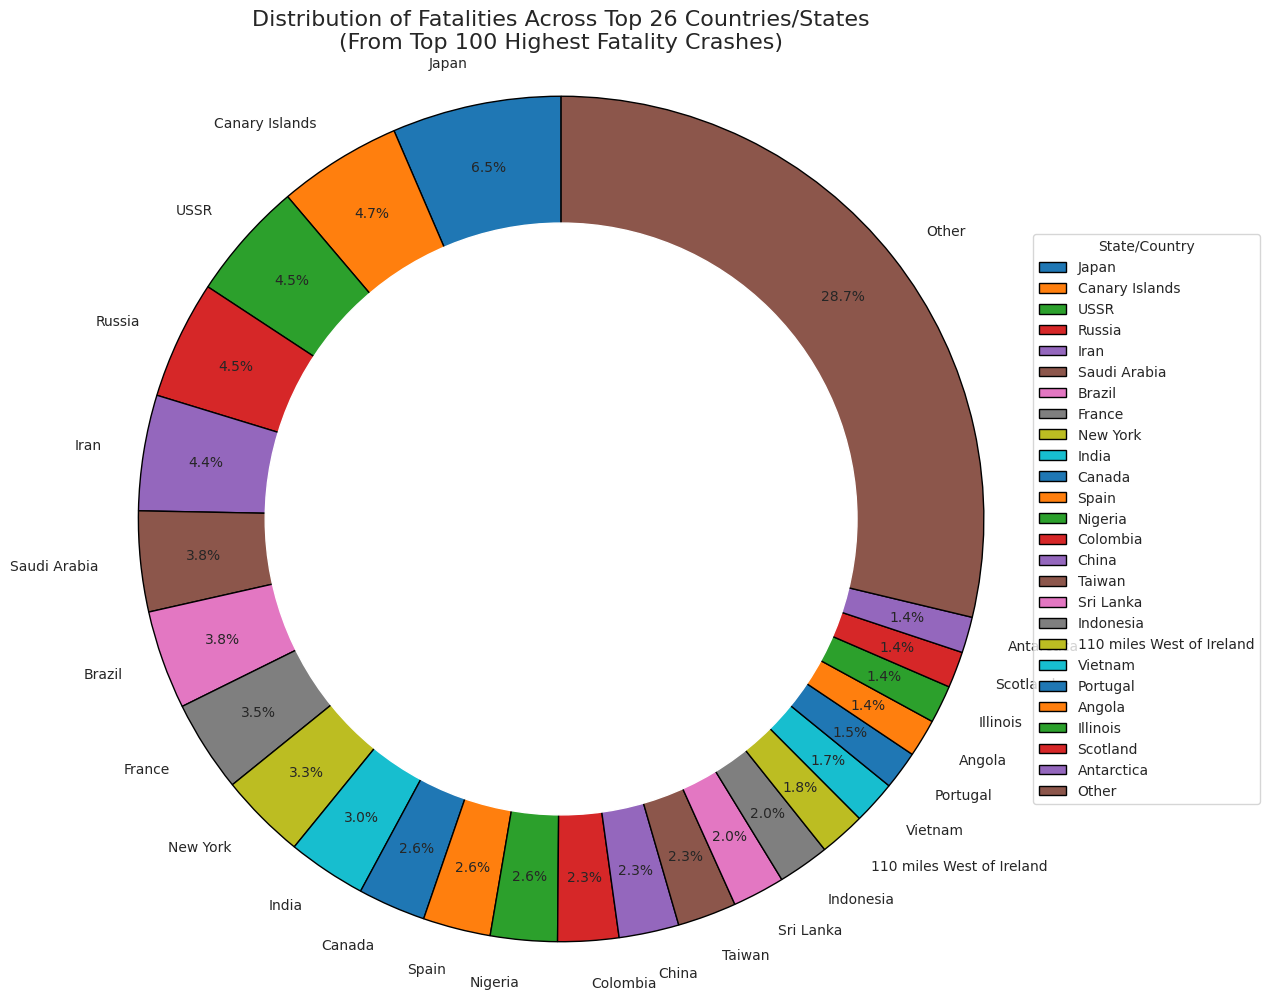

Pie chart generated successfully.


In [35]:
country_fatalities = top_100_crashes.groupby('State/Country')['Fatalities'].sum()

top_25_countries = country_fatalities.nlargest(25)

if len(country_fatalities) > 25:
    other_fatalities = country_fatalities[~country_fatalities.index.isin(top_25_countries.index)].sum()
    if other_fatalities > 0:
        top_25_countries['Other'] = other_fatalities


plt.figure(figsize=(12, 12))

wedges, texts, autotexts = plt.pie(
    top_25_countries,
    labels=top_25_countries.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'}
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title(f'Distribution of Fatalities Across Top {len(top_25_countries)} Countries/States\n(From Top 100 Highest Fatality Crashes)', fontsize=16)

plt.axis('equal')

plt.legend(wedges, top_25_countries.index,
          title="State/Country",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

print("Pie chart generated successfully.")